### 목표 설정

- 8천개의 버섯 데이터를 활용해서 먹을 수 있는 지 불가능 한지 분류
- 결정트리 모델을 학습 평가 해보고 시작
- 예측 관여율이 높은 데이터 확인

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 데이터 수집

- mushroom.csv 파일 불러오기

In [2]:
data =  pd.read_csv('./data/mushroom.csv')

# 데이터를 분할 해주는 구분자는 CSV파일의 기본값으로 콤마 사용
# 만약 구분자가 다르면 delimiter 옵션에 그 구분자를 넣어주면 됨

data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# head() 함수를 이용해서 데이터 추출

data.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
# 기술 통계

data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.describe().T

,count,unique,top,freq
poisonous,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


- 문자형 데이터는 수치형 데이터와는 다른 통계치가 나옴
- top : 해당 컬럼에서 가장 많은 수를 차지하는 데이터
- freq : top에 해당하는 데이터의 수

### 데이터 전처리

- 결측치 없음, 이상치 확인 불가
- 학습용 데이터이기 때문에 이미 깔끔한 데이터, 전처리 pass

### EDA (탐색적 데이터 분석)

- 데이터에서 인사이트를 찾아내는 단계

In [7]:
# 설치 코드

!pip install seaborn

In [8]:
# matplolib 라이브러리가 시각화의 기본이라고 말하면
# seaborn 라이브러리는 다른 라이브러리와 호환가능하며 더 깔끔한 모습

import seaborn as sns

<Axes: xlabel='cap-shape', ylabel='count'>

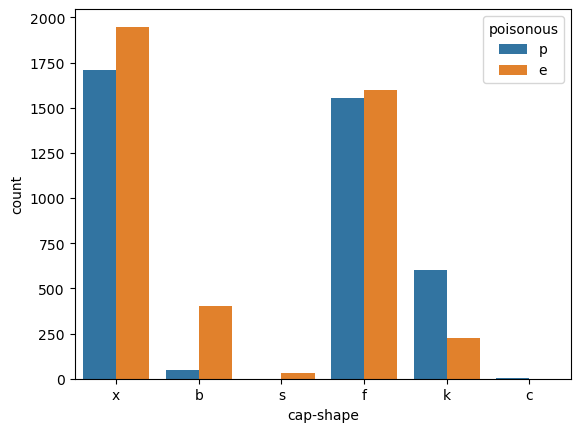

In [9]:
# countplot : 막대 그래프, bar chart

sns.countplot(data = data, # 데이터 프레임이 들어감
              x = "cap-shape", # x축에 들어갈 특성
              hue = "poisonous" # 해당 컬럼의 값들의 수가 bar chart로 출력
                                # 범례도 같이 자동 출력
              )

1. s는 전체 식용, c는 전체 독성
2. b는 대부분이 식용, k는 대부분이 독성
3. x와 f는 많은 지분을 차지 중

<Axes: xlabel='cap-surface', ylabel='count'>

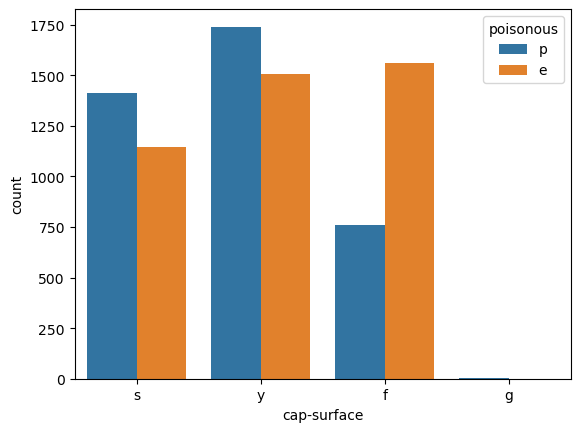

In [10]:
sns.countplot(data = data, 
              x = "cap-surface",
              hue = "poisonous" 
              )

<Axes: xlabel='count', ylabel='cap-surface'>

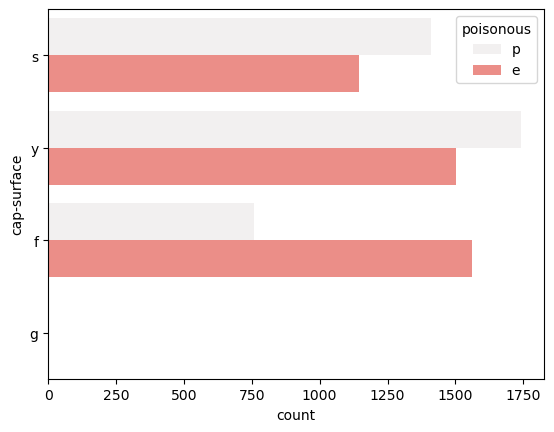

In [11]:
sns.countplot(data = data, 
              y = "cap-surface",
              hue = "poisonous",
              color = "#FC7F77"
              )

### 모델링

1. 데이터 분리
2. 모델 선택
3. 하이퍼 파라미터 튜닝
4. 학습
5. 평가
6. 시각화

In [12]:
# 데이터 분리
# 1. 문제와 정답 분리 (hint. 정답 컬럼 poisonous)

X = data.drop("poisonous", axis=1)
y = data.loc[ : , "poisonous"]

In [13]:
X.shape, y.shape

((8124, 22), (8124,))

In [14]:
# train_test_split을 통해 데이터 분할

# 1. 모듈 불러오기

from sklearn.model_selection import train_test_split

In [15]:
# 2. 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 14)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 22), (2438, 22), (5686,), (2438,))

In [17]:
# 모델 불러오기

from sklearn.tree import DecisionTreeClassifier

In [18]:
# 모델 객체 생성

tree_mush01 = DecisionTreeClassifier() # 기본 모델

In [19]:
# 모델 학습

- 머신러닝 모델은 숫자로 값을 입력받기를 기대
- 문자값을 넣어주면 작동을 하지 못함
- 따라서 문자값을 숫자로 바꿔주는 인코딩이 필요함

*인코딩 (encoding)
- 범주형의 데이터를 수치형의 데이터로 전환

*바이닝 (binning)
- 수치형의 데이터를 범주형으로 전환

In [20]:
# 1.Label인코딩
# 특성에 유니크한 값의 갯수에 따라 숫자를 1씩 증가시켜 mapping
# *) 회귀파트에서는 절대 사용 불가 - 숫자에 따른 순서나 중요도 인식가능성 존재

In [21]:
# ex) 

X["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [22]:
# Before

X["cap-shape"]

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [23]:
# after

X["cap-shape"].map({"x" : 0, "b" : 1, "s" : 2, "f" : 3, "k" : 4, "c" : 5,})

0       0
1       0
2       1
3       0
4       0
       ..
8119    4
8120    0
8121    3
8122    4
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [24]:
# 레이블 인코딩을 쉽게

from sklearn.preprocessing import LabelEncoder

In [25]:
# 인코더 객체 생성

encoder = LabelEncoder()

In [26]:
# 인코더 학습

encoder.fit(X["cap-shape"])

LabelEncoder()

In [27]:
# 데이터 변환 - transform : 학습된 인코더의 문자들을 숫자로 변환

label = encoder.transform(X["cap-shape"])
label

array([5, 5, 0, ..., 2, 3, 5])

*원핫 인코딩

- 모든 데이터를 0과 1로 변환 
> 레이블에 유니크값 만큼 컬럼을 생성한 후 해당하는 데이터는 1, 해당하지 않으면 0으로
- 컴퓨터는 2진법으로 모든 데이터를 처리, 일반적으로 레이블 인코딩 보단 직관적으로 이해하기 쉬운 원핫 인코딩을 더 사용

In [28]:
# ex) 
temp = pd.get_dummies(X[["cap-shape", "cap-surface"]])
temp

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0
8120,0,0,0,0,0,1,0,0,1,0
8121,0,0,1,0,0,0,0,0,1,0
8122,0,0,0,1,0,0,0,0,0,1


### 인코딩을 이용해서 에러를 해결

- 원핫 인코딩 사용

In [29]:
# 전체 문제 데이터를 넣어주는 방법

X_one_hot = pd.get_dummies(X)

In [30]:
# 만약 데이터가 분할되어 있다면

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### 데이터 전처리 및 변환 시 주의점

- 훈련셋과 평가셋을 전처리 할 때 같은 방법으로 전처리가 진행되어야 함
- ex) 훈련용 문제 데이터는 원핫인코딩, 평가용 문제 데이터에는 레이블 인코딩을 적용한 경우

In [31]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, 
                                                    test_size = 0.3,
                                                    random_state = 14)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

In [33]:
# 모델 객체 생성

tree_mush01 = DecisionTreeClassifier()

In [34]:
# 모델 학습

tree_mush01.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# 모델 평가

tree_mush01.score(X_test, y_test)

1.0

In [36]:
# 정확도가 100% -> 모델의 구조 살피기 (시각화)

import graphviz

In [37]:
# 모델 시각화
# 1. 모델 시각화 파일 생성

from sklearn.tree import export_graphviz

In [38]:
export_graphviz(tree_mush01, # 학습 된 모델이 저장된 변수명
                out_file = "tree.dot", # 파일 명 및 저장 경로 설정
                class_names = ["독", "식용"], # 클래스(정답, 레이블) 이름 설정
                feature_names = X_one_hot.columns,
                impurity = True, # 지니 불순도 표시 여수
                filled = True # 노드에 색상을 채워주나
                )

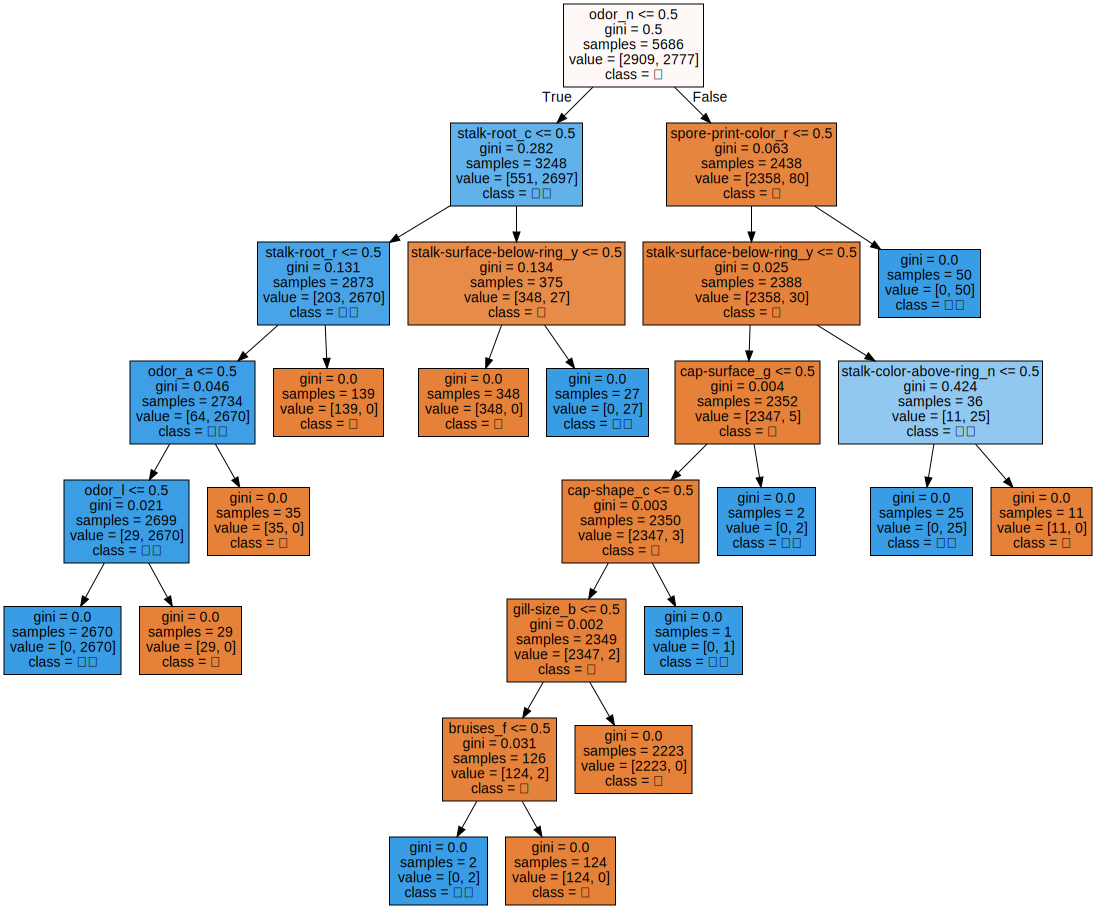

In [39]:
import graphviz

# tree01.dot 불러와서 인코딩 시켜주고 f로 저장

with open('tree.dot', encoding='UTF-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 모델 하이퍼 파라미터 수정

In [40]:
# max_depth 하이퍼 파라미터 수정

tree_mush02 = DecisionTreeClassifier(max_depth=3)

In [41]:
tree_mush02.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
tree_mush02.score(X_test, y_test)

0.9835931091058244

In [43]:
export_graphviz(tree_mush02,
                out_file = "tree02.dot",
                class_names = ["독", "식용"],
                feature_names = X_one_hot.columns,
                impurity = True,
                filled = True
                )

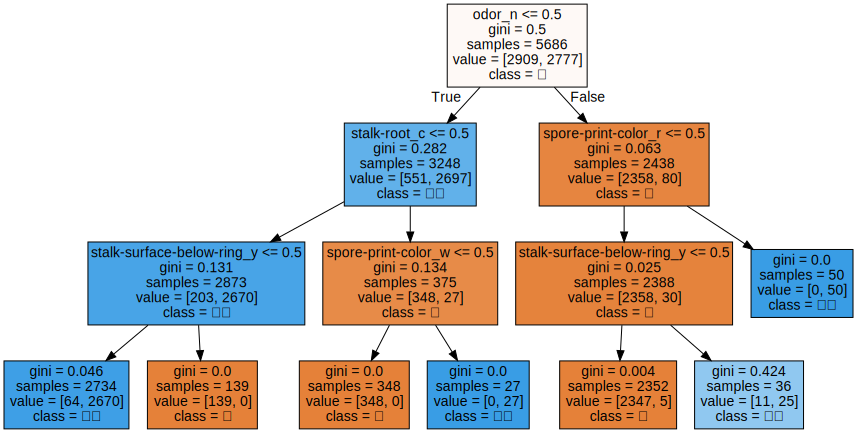

In [44]:
import graphviz

# tree02.dot 불러와서 인코딩 시켜주고 f로 저장

with open('tree02.dot', encoding='UTF-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 특성 중요도 살피기

In [47]:
# feature_importances_ : 특성 중요도를 표시
tree_mush01.feature_importances_

array([0.00000000e+00, 7.02364503e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40293726e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38537833e-03, 0.00000000e+00, 2.37999709e-02, 0.00000000e+00,
       0.00000000e+00, 2.01926645e-02, 0.00000000e+00, 6.23503261e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11462395e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.71611537e-01, 0.00000000e+00, 8.87953945e-02,
      

# 0803

In [56]:
# 가시성을 위해 판다스 데이터 프레임화

fi = pd.DataFrame(tree_mush01.feature_importances_)

# 인덱스 설정

fi.set_index(X_one_hot.columns, inplace=True)
fi

,0
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [55]:
# 특성 중요도를 내림차순으로 정렬해보자

fi.sort_values(by=0, ascending=False)

,0
27,0.623503
53,0.171612
55,0.088795
100,0.033611
63,0.029598
...,...
38,0.000000
37,0.000000
36,0.000000
34,0.000000


- 현재 버섯데이터는 oder_n이라는 컬럼이 특성 중요도가 가장 높음 (약 62%)
- 특성 중요도 : 정답을 예측하는 데 있어서 얼마나 영향을 미치는 가
- 특성 중요도가 가장 높은 데이터를 질문으로 던져서 분류를 진행 했을 때 효율적으로 데이터를 분류 할 수 있음

### 교차 검증

- 교차 검증을 이용해서 모델의 일반화 성능 기대값을 알아보는 용도

In [57]:
# 모듈 불러오기

from sklearn.model_selection import cross_val_score

In [60]:
# 모듈 사용해보기
# cross_val_score(모델 객체, 훈련용 문제 데이터, 훈련용 정답 데이터, 몇 등분)

rs = cross_val_score(tree_mush01, X_train, y_train, cv = 5)

# 평균값 구해주기

print(rs)
print(rs.mean())

[1.         1.         1.         0.99912049 1.        ]
0.9998240985048372
